# 📊 Optimal Portfolio Allocation using Adam Optimizatio

In [26]:
from load_data import load_data,plot_cor,plot_distribution
from optimization import cal_mean_var,mvp,MaxSharpe,Max_util,RtnPerRisk,plot_port,expand_weights,active
from GBM import GBM_simulation

## Data Processing

[*********************100%***********************]  6 of 6 completed


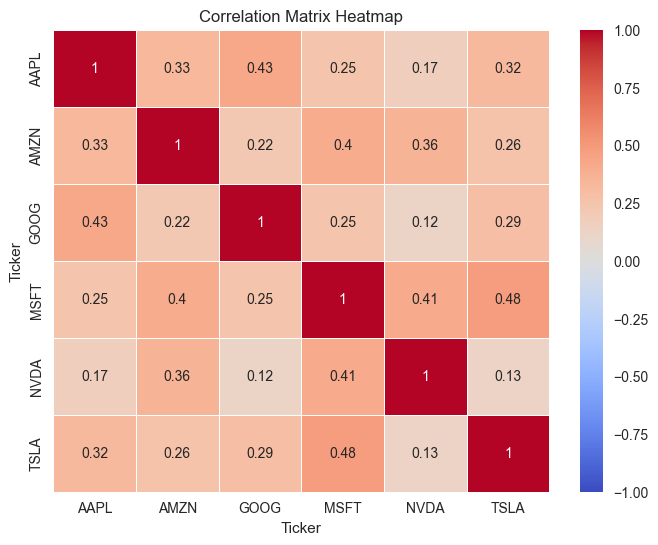

In [27]:
stock_list = ["NVDA", "AAPL", "MSFT","GOOG","TSLA","AMZN"]
rtn = load_data(stock_list)
mean_rtn = rtn.mean().to_numpy()
cov_m = rtn.cov().to_numpy()
cor_m = rtn.corr()
plot_cor(cor_m)

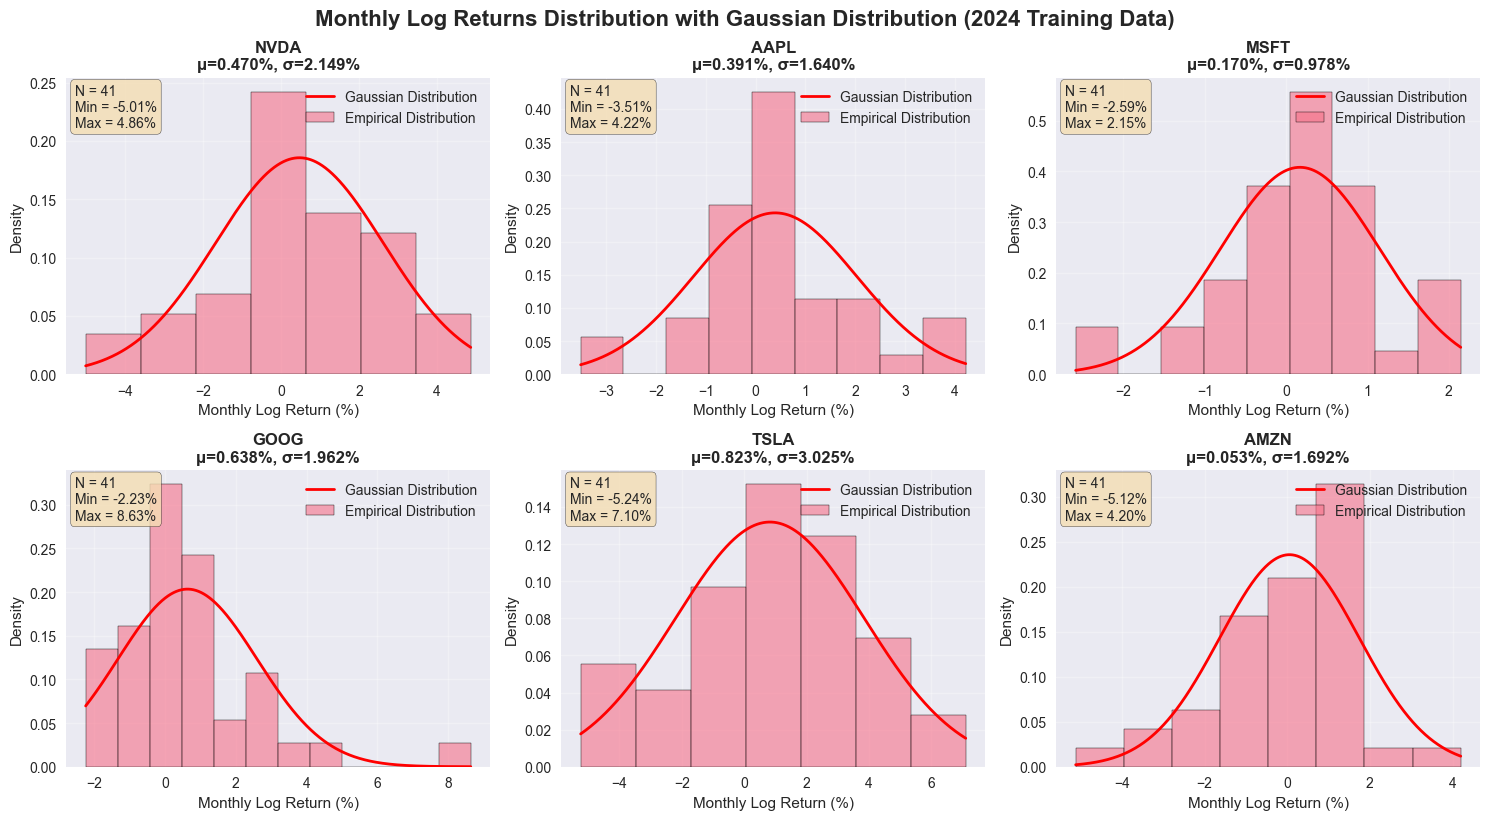

In [28]:
plot_distribution(rtn,stock_list)

## Construct Portfolio And Back-Testing

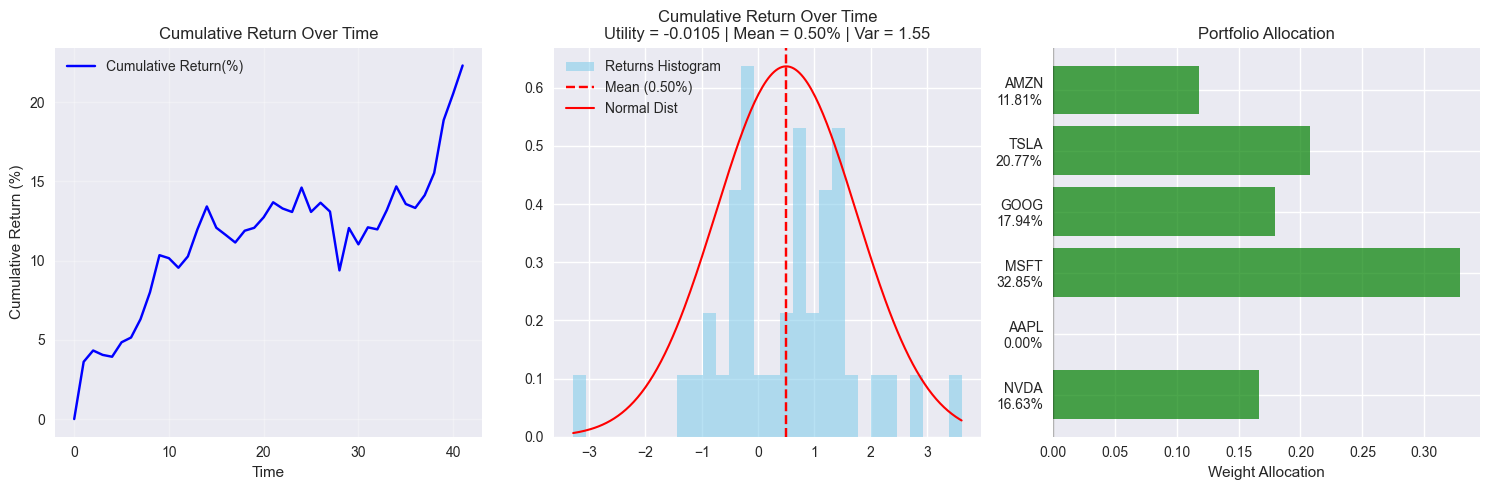

In [29]:
# ["NVDA", "AAPL", "MSFT","GOOG","TSLA","AMZN"]
short_res = [1, 0, 1, 1, 1, 1]
mean_rtn_active,cov_m_active = active(short_res,mean_rtn,cov_m)

alg = 2
A = 200
r = 0.045
r_daily = r/252
target_return = 0.005
match alg:
    case 1:
        w = Max_util(mean_rtn_active, cov_m_active, A)
    case 2:
        w = mvp(mean_rtn_active,cov_m_active,target_return=target_return)
    case 3:
        w = mvp(mean_rtn_active,cov_m_active)
    case 4:
        w = MaxSharpe(mean_rtn_active,cov_m_active,r_daily)
    case _:
        w = RtnPerRisk(mean_rtn_active,cov_m_active)
w = expand_weights(w, short_res)
plot_port(w, mean_rtn, cov_m,rtn,stock_list,A)


## Geometric Brownian Motions

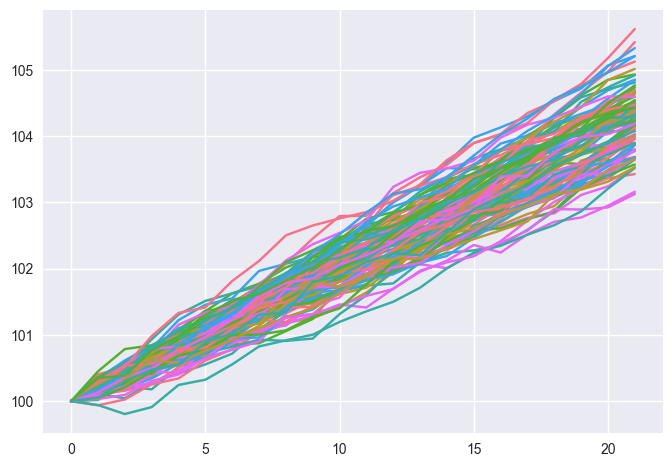

In [31]:
T = 1/12
N = int(T*252)
S0 = 100
dt = 1 / 252
M = 100

mu_port,sigma_port = cal_mean_var(w,mean_rtn,cov_m)
mu_annual = mu_port*100
vol_annual = sigma_port*100
GBM_simulation(vol_annual=vol_annual,mu_annual=mu_annual,S0=S0,T=T,N=N,M=M)